In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload

%autoreload 2

%matplotlib notebook
sns.set()

In [2]:
from mdetsims import Sim

In [3]:
mbobs = Sim(
    rng=np.random.RandomState(seed=332327),
    g1=0.02,
    gal_type='ground_galsim_parametric',
    psf_type='gauss',
    n_coadd=4).get_mbobs()

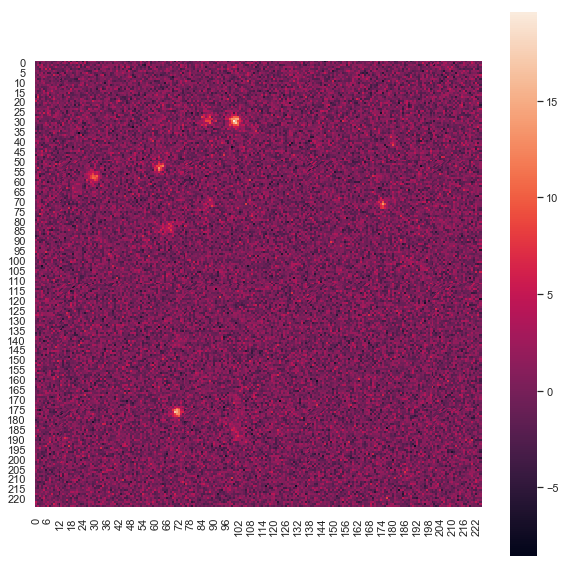

In [4]:
plt.figure(figsize=(10, 10))
sns.heatmap(mbobs[0][0].image, square=True)

In [5]:
from mdetsims import Sim, TEST_METADETECT_CONFIG
from metadetect.metadetect import Metadetect

In [6]:
import tqdm

def _run_sim(seed):
    rng = np.random.RandomState(seed=seed)
    mbobs = Sim(
        rng=rng,
        g1=0.02,
        gal_type='ground_galsim_parametric',
        psf_type='gauss',
        n_coadd=15).get_mbobs()

    config = {}
    config.update(TEST_METADETECT_CONFIG)

    md = Metadetect(config, mbobs, rng)
    md.go()
    res = md.result
    return res['noshear']

vals = []
for seed in tqdm.trange(1, 20):
    res = _run_sim(seed)
    vals.extend(res.tolist())

100%|██████████| 19/19 [01:21<00:00,  3.35s/it]


In [7]:
res = np.array(vals, dtype=res.dtype)
msk = (res['flags'] == 0) & (res['wmom_s2n'] > 0)
res = res[msk]

<Figure size 432x288 with 0 Axes>

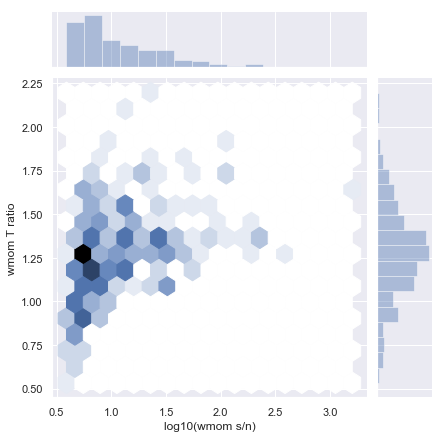

In [8]:
plt.figure()
axj = sns.jointplot(np.log10(res['wmom_s2n']), res['wmom_T_ratio'], kind='hex')
axj.set_axis_labels('log10(wmom s/n)', 'wmom T ratio')